In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileList = glob.glob("../Datasets/Dataset_1B/*/*.csv")

In [3]:
df = pd.DataFrame.from_dict(fileList)
df.rename(columns={0:"path"},inplace = True)

In [4]:
df["file"] = df["path"].apply(lambda x: x.split("/")[-1])


In [5]:
df.head()

,path,file
0,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...
1,../Datasets/Dataset_1B/User25/321_MetaWear_202...,321_MetaWear_2021-08-01T15.09.34.379_EB942CED9...
2,../Datasets/Dataset_1B/User25/318_MetaWear_202...,318_MetaWear_2021-08-01T14.59.48.670_EB942CED9...
3,../Datasets/Dataset_1B/User25/325_MetaWear_202...,325_MetaWear_2021-08-01T15.25.27.809_EB942CED9...
4,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...


In [6]:
df["expID"] = df["file"].apply(lambda x: x.split("_")[0])

In [7]:
df.head()

,path,file,expID
0,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...,316
1,../Datasets/Dataset_1B/User25/321_MetaWear_202...,321_MetaWear_2021-08-01T15.09.34.379_EB942CED9...,321
2,../Datasets/Dataset_1B/User25/318_MetaWear_202...,318_MetaWear_2021-08-01T14.59.48.670_EB942CED9...,318
3,../Datasets/Dataset_1B/User25/325_MetaWear_202...,325_MetaWear_2021-08-01T15.25.27.809_EB942CED9...,325
4,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...,316


In [8]:
df.loc[0,"file"]

'316_MetaWear_2021-08-01T14.52.00.189_EB942CED9472_Accelerometer_100.000Hz_1.5.1.csv'

In [9]:
df.loc[0,"file"].split("_")[4]

'Accelerometer'

In [10]:
df.loc[0,"file"].split("_")[5]

'100.000Hz'

In [11]:
df["sensor"] = df["file"].apply(lambda x: x.split("_")[4])
df["frequency"] = df["file"].apply(lambda x: x.split("_")[5])

In [12]:
df.head()

,path,file,expID,sensor,frequency
0,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...,316,Accelerometer,100.000Hz
1,../Datasets/Dataset_1B/User25/321_MetaWear_202...,321_MetaWear_2021-08-01T15.09.34.379_EB942CED9...,321,Accelerometer,100.000Hz
2,../Datasets/Dataset_1B/User25/318_MetaWear_202...,318_MetaWear_2021-08-01T14.59.48.670_EB942CED9...,318,Gyroscope,100.000Hz
3,../Datasets/Dataset_1B/User25/325_MetaWear_202...,325_MetaWear_2021-08-01T15.25.27.809_EB942CED9...,325,Gyroscope,100.000Hz
4,../Datasets/Dataset_1B/User25/316_MetaWear_202...,316_MetaWear_2021-08-01T14.52.00.189_EB942CED9...,316,Gyroscope,100.000Hz


In [13]:
df["expID"] = df["expID"].astype("int32")

In [14]:
df.sort_values(by="expID",inplace=True)

In [15]:
# Dropping rows where our required sensors are not present in the experiment

required_sensors = {"Accelerometer", "Gyroscope"}

df_filtered = (
    df.groupby("expID")
      .filter(lambda x: required_sensors.issubset(set(x["sensor"])))
)

In [16]:
expDic = {
    1: "Sitting: Reading a book",
    2: "Sitting: Writing in a notebook",
    3: "Using computer: Typing",
    4: "Using computer: Browsing",
    5: "While sitting: Moving head, body",
    6: "While sitting: Moving chair",
    7: "Sitting: Stand up from sitting",
    8: "Standing",
    9: "Walking",
    10: "Running",
    11: "Taking stairs",
    12: "Sitting: Wear/Remove device protocol",
    13: "Standing: Wear/Remove device protocol",
    14: "Sitting: Pick up items from floor",
    15: "Standing: Pick up items from floor"
}

def exp_No(expID):
    if expID%15 == 0:
        return 15
    return expID % 15

def exp_Name(exp_No):
    return expDic[exp_No]

In [17]:
df["exp_No"] = df["expID"].apply(exp_No)
df["exp_Name"] = df["exp_No"].apply(exp_Name)

In [18]:
pd.set_option('display.max_rows', None)

In [19]:
df.head()

,path,file,expID,sensor,frequency,exp_No,exp_Name
215,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Magnetometer,20.000Hz,13,Standing: Wear/Remove device protocol
196,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Pressure,7.330Hz,13,Standing: Wear/Remove device protocol
189,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Accelerometer,100.000Hz,13,Standing: Wear/Remove device protocol
227,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Gyroscope,100.000Hz,13,Standing: Wear/Remove device protocol
206,../Datasets/Dataset_1B/User13/134_MetaWear_202...,134_MetaWear_2020-10-17T11.15.46.994_F1E55E2FE...,134,Magnetometer,20.000Hz,14,Sitting: Pick up items from floor


## Check the frequency

In [20]:
df.drop_duplicates(subset=["frequency","sensor"])

,path,file,expID,sensor,frequency,exp_No,exp_Name
215,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Magnetometer,20.000Hz,13,Standing: Wear/Remove device protocol
196,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Pressure,7.330Hz,13,Standing: Wear/Remove device protocol
189,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Accelerometer,100.000Hz,13,Standing: Wear/Remove device protocol
227,../Datasets/Dataset_1B/User13/133_MetaWear_202...,133_MetaWear_2020-10-17T11.12.15.428_F1E55E2FE...,133,Gyroscope,100.000Hz,13,Standing: Wear/Remove device protocol
179,../Datasets/Dataset_1B/User13/147_MetaWear_202...,147_MetaWear_2020-10-17T11.52.05.312_F1E55E2FE...,147,Pressure,3.820Hz,12,Sitting: Wear/Remove device protocol
103,../Datasets/Dataset_1B/User22/268_Werable1_202...,268_Werable1_2020-11-07T10.07.24.833_F1E55E2FE...,268,Accelerometer,50.000Hz,13,Standing: Wear/Remove device protocol
82,../Datasets/Dataset_1B/User22/273_Werable1_202...,273_Werable1_2020-11-07T10.29.47.662_F1E55E2FE...,273,Gyroscope,25.000Hz,3,Using computer: Typing
107,../Datasets/Dataset_1B/User22/277_Werable1_202...,277_Werable1_2020-11-07T10.58.42.895_F1E55E2FE...,277,Pressure,13.510Hz,7,Sitting: Stand up from sitting


# Visuals

In [21]:
def fig_presure(file):
    data_pre = pd.read_csv(file)
    data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

    # strs = file.split('\\')[6].split('_')
    # label = strs[0] + '-' + strs[4]
    label = "1" + '-' + "Pressure"
    data_pre = data_pre[['pressure']]
    data_pre = data_pre.reset_index(drop=True)
    axarr.plot(data_pre)
    # axarr.set_ylim(97200, 98000)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Pressure (unit)')
    axarr.set_title('Pressure: ' + label)

In [22]:
def fig_magnetometer(file):
    data_mag = pd.read_csv(file)
    data_mag.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Magnetometer'
    data_mag = data_mag[['x','y','z']]
    data_mag = data_mag.reset_index(drop=True)
    axarr.plot(data_mag*1000)
    axarr.set_ylim(-0.25, 0.25)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Magnetometer (unit)')
    axarr.set_title('Magnetometer: ' + label)

In [23]:
def fig_accelerometer(file):
    data_acc = pd.read_csv(file)
    data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
    fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-accelerometer'
    data_acc = data_acc[['x','y','z']]
    data_acc = data_acc.reset_index(drop=True)
    axarr.plot(data_acc)
    axarr.set_ylim(-2, 2)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Acceleration (m/s^2)')
    axarr.set_title('Accelerometer: ' + label)

In [24]:
def fig_gyroscope(file):
    data_gyr = pd.read_csv(file)
    data_gyr.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']

    fig, axarr = plt.subplots(1, 1, figsize=(10,8), sharex=True)
    fig.tight_layout()

#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    label = '1-Gyroscope'


#     strs = file.split('\\')[6].split('_')
#     label = strs[0] + '-' + strs[4]
    data_gyr = data_gyr[['x','y','z']]
    data_gyr = data_gyr.reset_index(drop=True)
    axarr.plot(data_gyr)
    axarr.set_ylim(-160, 160)
    axarr.grid(which='both')
    axarr.set_xlabel('Time (ms)')
    axarr.set_ylabel('Rotation (dgree/s^2)')
    axarr.set_title('Gyroscope: ' + label)

# Sitting and Reading a Book


In [25]:
# Reading Book Data
reading_book_df = df[df["exp_No"] == 1]

In [26]:
reading_book_df["sensor"].value_counts()

sensor
Accelerometer    16
Gyroscope        15
Magnetometer     15
Pressure         15
Name: count, dtype: int64

In [27]:
reading_book_df["expID"].value_counts()

expID
331    5
136    4
151    4
166    4
181    4
196    4
211    4
226    4
241    4
256    4
271    4
286    4
301    4
316    4
346    4
Name: count, dtype: int64

In [28]:
reading_book_df["sensor"]

184        Gyroscope
173     Magnetometer
192         Pressure
205    Accelerometer
118    Accelerometer
140     Magnetometer
145        Gyroscope
168         Pressure
246    Accelerometer
256         Pressure
257        Gyroscope
252     Magnetometer
633         Pressure
675        Gyroscope
674     Magnetometer
666    Accelerometer
565         Pressure
563    Accelerometer
570        Gyroscope
611     Magnetometer
778        Gyroscope
770    Accelerometer
735         Pressure
755     Magnetometer
530         Pressure
523     Magnetometer
548        Gyroscope
551    Accelerometer
817     Magnetometer
813    Accelerometer
797         Pressure
846        Gyroscope
443     Magnetometer
442         Pressure
440    Accelerometer
429        Gyroscope
75         Gyroscope
108    Accelerometer
90          Pressure
61      Magnetometer
334     Magnetometer
297        Gyroscope
340         Pressure
301    Accelerometer
383        Gyroscope
350         Pressure
368     Magnetometer
369    Accele

In [29]:
reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[0,:]

path         ../Datasets/Dataset_1B/User13/136_MetaWear_202...
file         136_MetaWear_2020-10-17T10.53.42.229_F1E55E2FE...
expID                                                      136
sensor                                                Pressure
frequency                                              7.330Hz
exp_No                                                       1
exp_Name                               Sitting: Reading a book
Name: 192, dtype: object

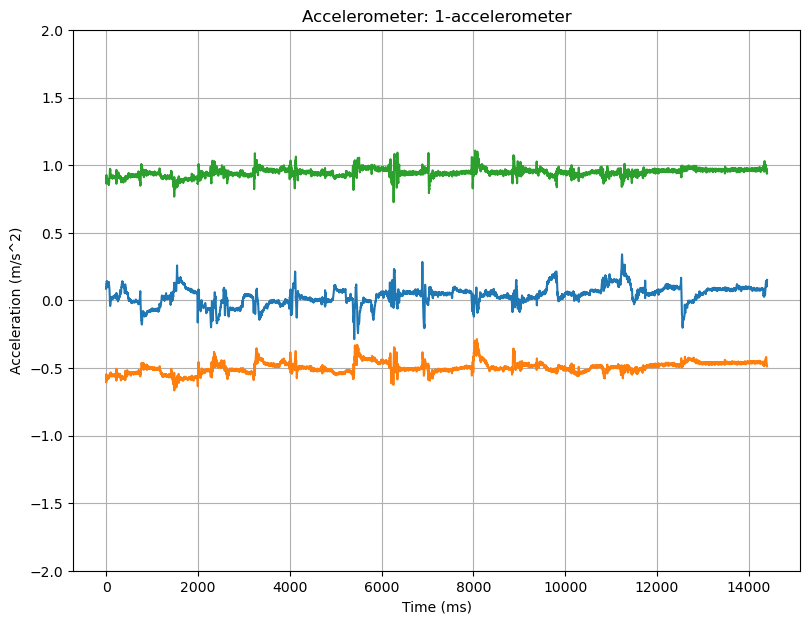

In [30]:
fig_accelerometer(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

In [31]:
data_acc = pd.read_csv(reading_book_df[reading_book_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])
data_acc.columns = ['timestamp', 'time', 'elapsed', 'x', 'y', 'z']
data_acc.describe()

,timestamp,elapsed,x,y,z
count,1.439800e+04,14398.000000,14398.000000,14398.000000,14398.000000
mean,1.603548e+12,71.985000,0.034362,-0.495728,0.945734
std,4.156489e+04,41.564889,0.067354,0.042526,0.029940
min,1.603548e+12,0.000000,-0.287000,-0.667000,0.726000
25%,1.603548e+12,35.992500,-0.003000,-0.519000,0.931000
50%,1.603548e+12,71.985000,0.042000,-0.498000,0.947000
75%,1.603548e+12,107.977500,0.075000,-0.468000,0.963000
max,1.603548e+12,143.970000,0.340000,-0.286000,1.108000


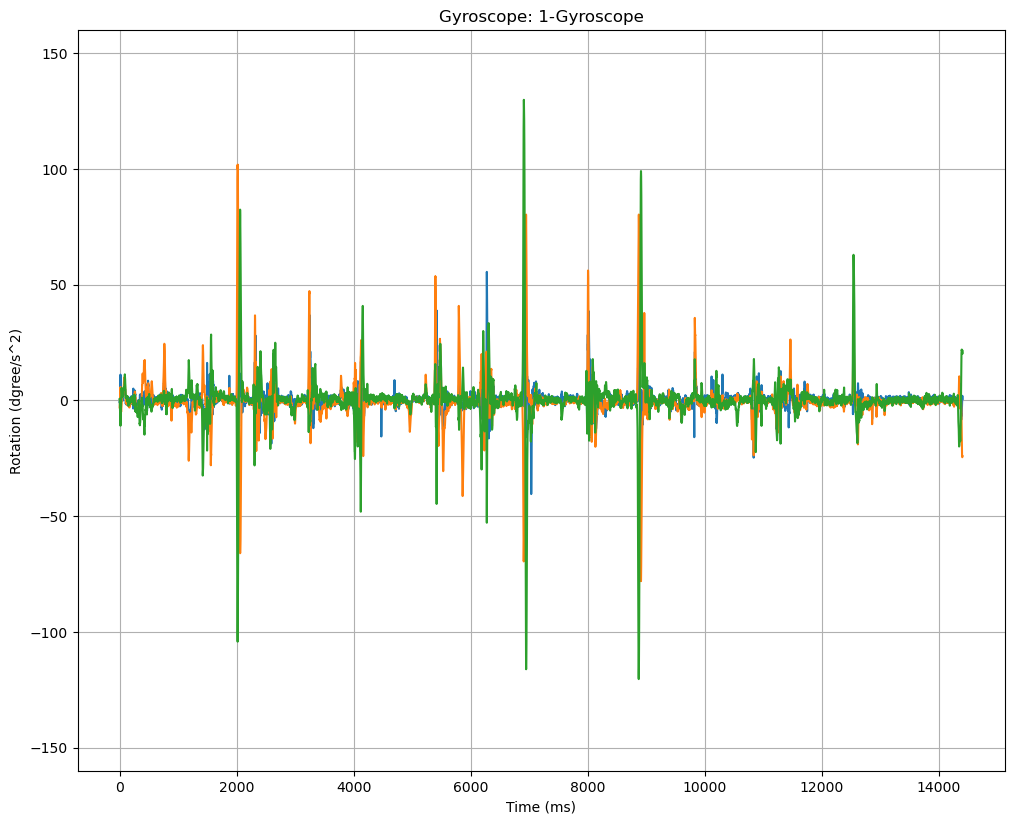

In [32]:
fig_gyroscope(reading_book_df[reading_book_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])


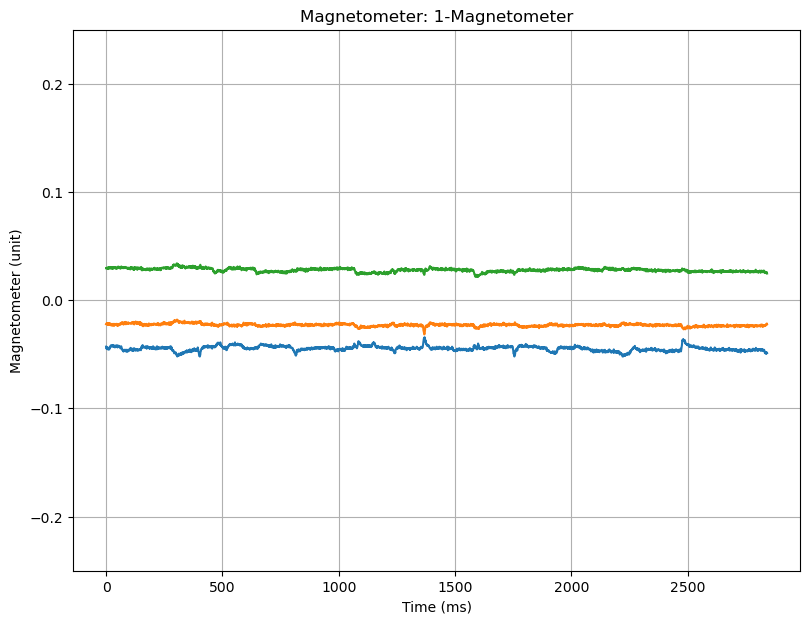

In [33]:
fig_magnetometer(reading_book_df[reading_book_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

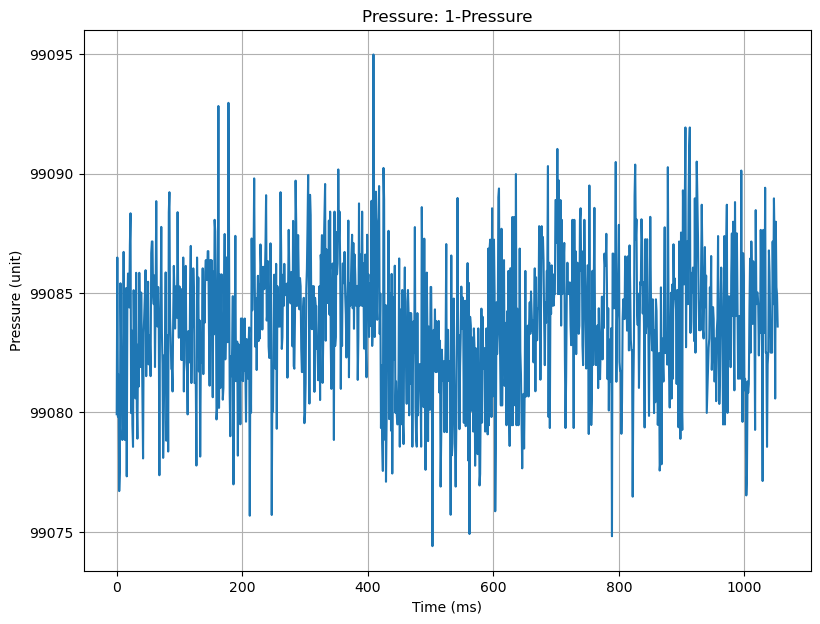

In [34]:
fig_presure(reading_book_df[reading_book_df["sensor"] == "Pressure"].iloc[1,:]["path"])


# Sitting and writing on a notebook

In [35]:
# Using Computer Data
using_computer_df = df[df["exp_No"] == 2]

In [36]:
using_computer_df["sensor"].value_counts()

sensor
Pressure         15
Gyroscope        15
Magnetometer     15
Accelerometer    15
Name: count, dtype: int64

In [37]:
using_computer_df["expID"].value_counts()

expID
137    4
152    4
167    4
182    4
197    4
212    4
227    4
242    4
257    4
272    4
287    4
302    4
317    4
332    4
347    4
Name: count, dtype: int64

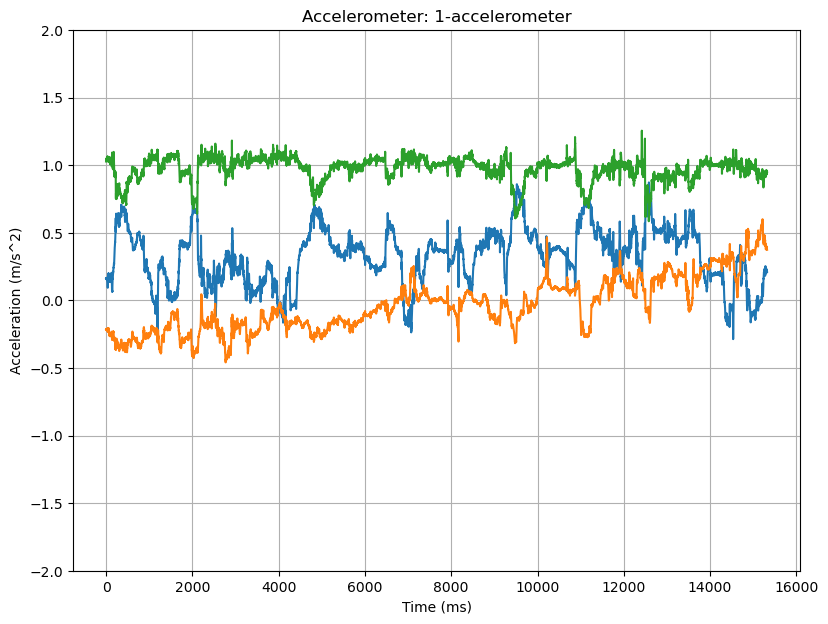

In [38]:
fig_accelerometer(using_computer_df[using_computer_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

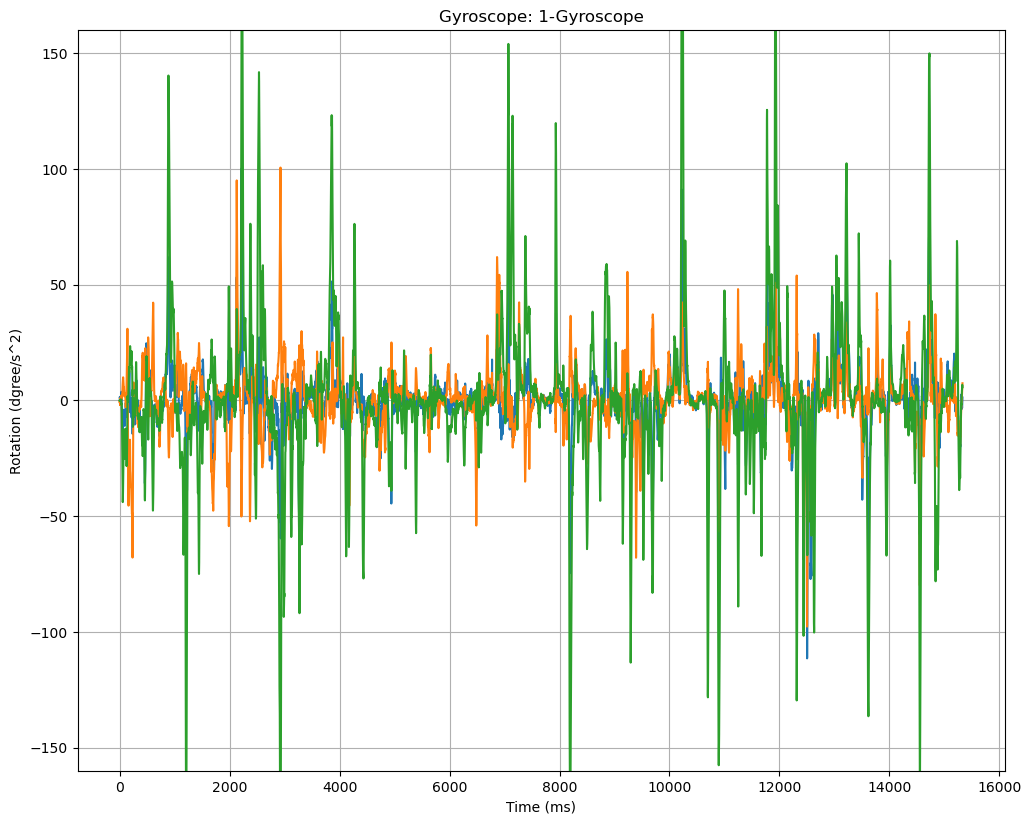

In [39]:
fig_gyroscope(using_computer_df[using_computer_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

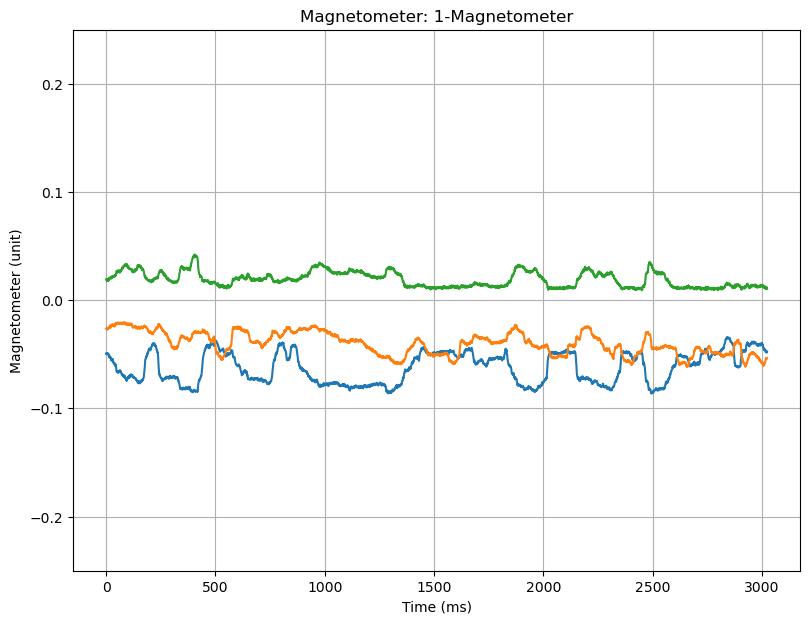

In [40]:
fig_magnetometer(using_computer_df[using_computer_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

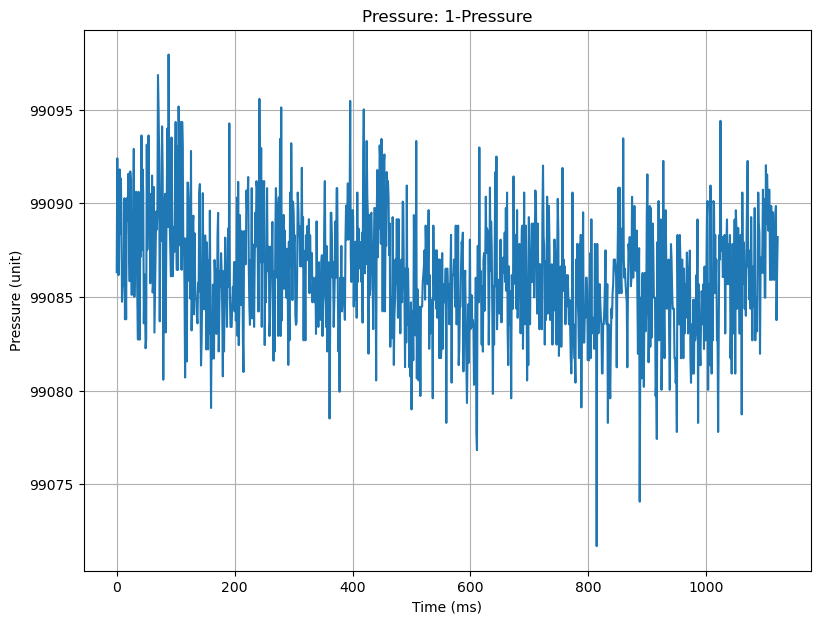

In [41]:
data_pre = pd.read_csv(using_computer_df[using_computer_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

# Typing

In [42]:
# Stand up
stand_up_df = df[df["exp_No"] == 3]

In [43]:
stand_up_df["sensor"].value_counts()

sensor
Gyroscope        15
Pressure         15
Accelerometer    15
Magnetometer     15
Name: count, dtype: int64

In [44]:
stand_up_df["expID"].value_counts()

expID
138    4
153    4
168    4
183    4
198    4
213    4
228    4
243    4
258    4
273    4
288    4
303    4
318    4
333    4
348    4
Name: count, dtype: int64

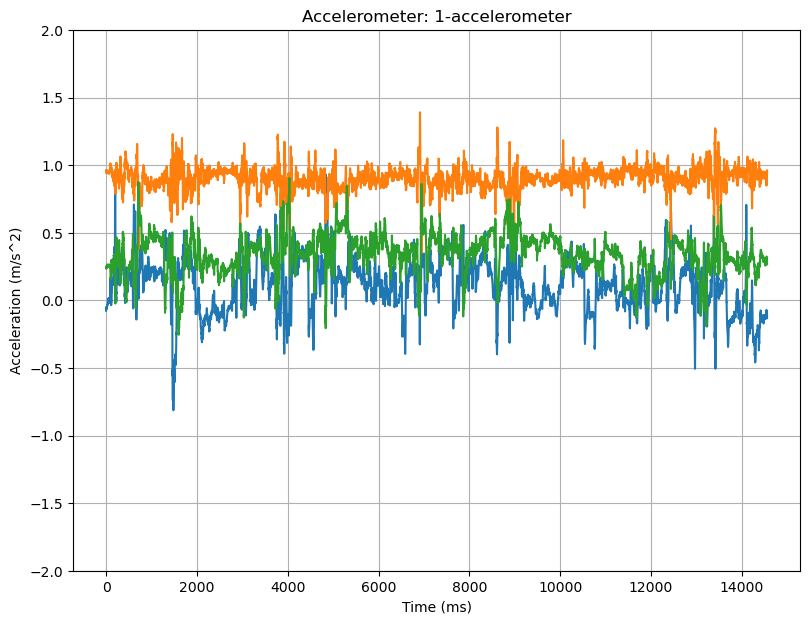

In [45]:
fig_accelerometer(stand_up_df[stand_up_df["sensor"] == "Accelerometer"].iloc[1,:]["path"])

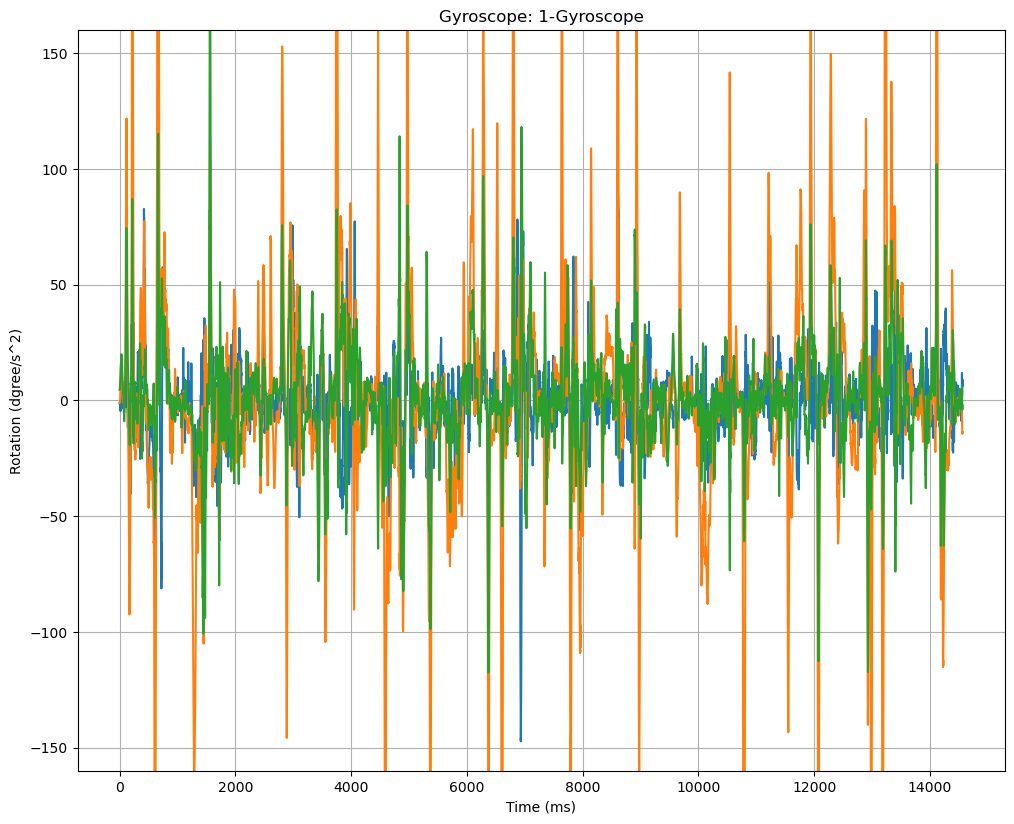

In [46]:
fig_gyroscope(stand_up_df[stand_up_df["sensor"] == "Gyroscope"].iloc[1,:]["path"])

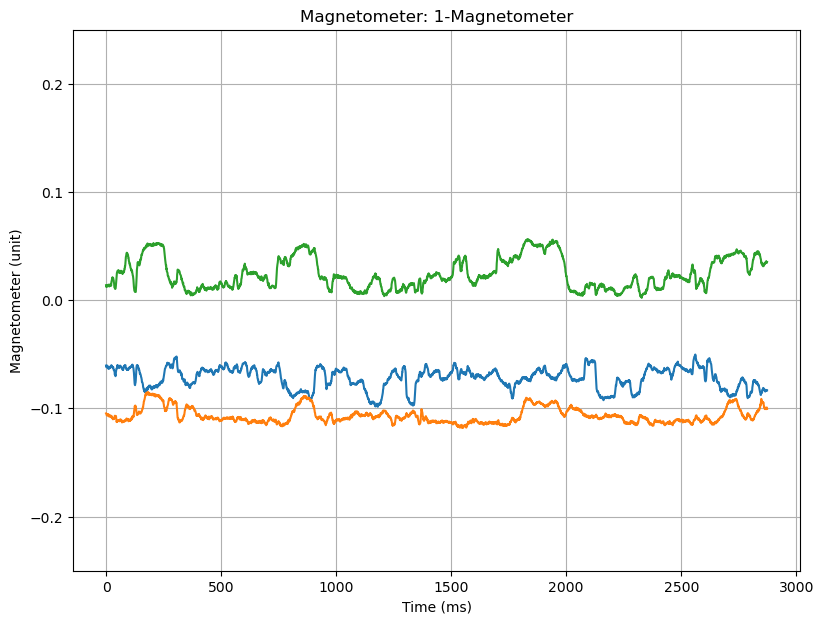

In [47]:
fig_magnetometer(stand_up_df[stand_up_df["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

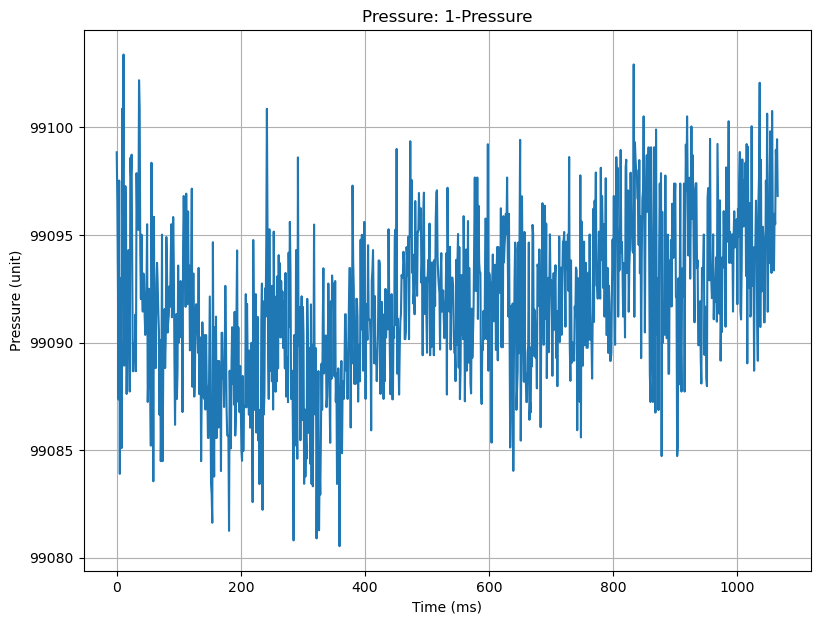

In [48]:
data_pre = pd.read_csv(stand_up_df[stand_up_df["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [49]:
data_pre

,pressure
0,99098.844
1,99096.672
2,99092.609
3,99087.352
4,99097.531
5,99083.891
6,99092.984
7,99089.867
8,99085.094
9,99100.875


In [50]:
data_pre.describe()

,pressure
count,1066.000000
mean,99091.810817
std,3.750752
min,99080.531000
25%,99089.281000
50%,99091.781000
75%,99094.398500
max,99103.391000


# Browsing


In [51]:
# browsing
browsing = df[df["exp_No"] == 4]

In [52]:
browsing["sensor"].value_counts()

sensor
Pressure         14
Gyroscope        14
Magnetometer     14
Accelerometer    13
Name: count, dtype: int64

In [53]:
browsing["expID"].value_counts()

expID
139    4
154    4
169    4
184    4
199    4
214    4
229    4
244    4
259    4
289    4
304    4
319    4
349    4
334    3
Name: count, dtype: int64

In [54]:
browsing["sensor"].value_counts()

sensor
Pressure         14
Gyroscope        14
Magnetometer     14
Accelerometer    13
Name: count, dtype: int64

In [55]:
browsing["expID"].value_counts()

expID
139    4
154    4
169    4
184    4
199    4
214    4
229    4
244    4
259    4
289    4
304    4
319    4
349    4
334    3
Name: count, dtype: int64

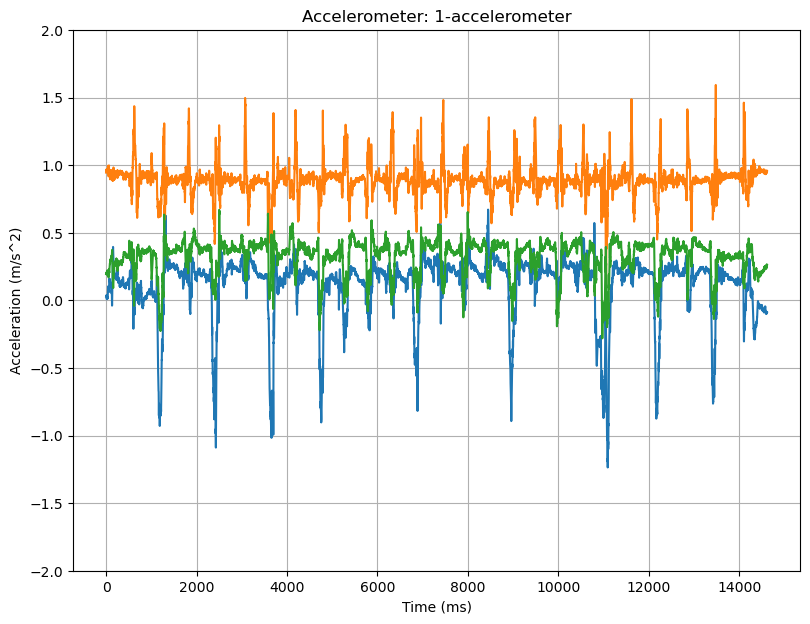

In [56]:
fig_accelerometer(browsing[browsing["sensor"] == "Accelerometer"].iloc[1,:]["path"])

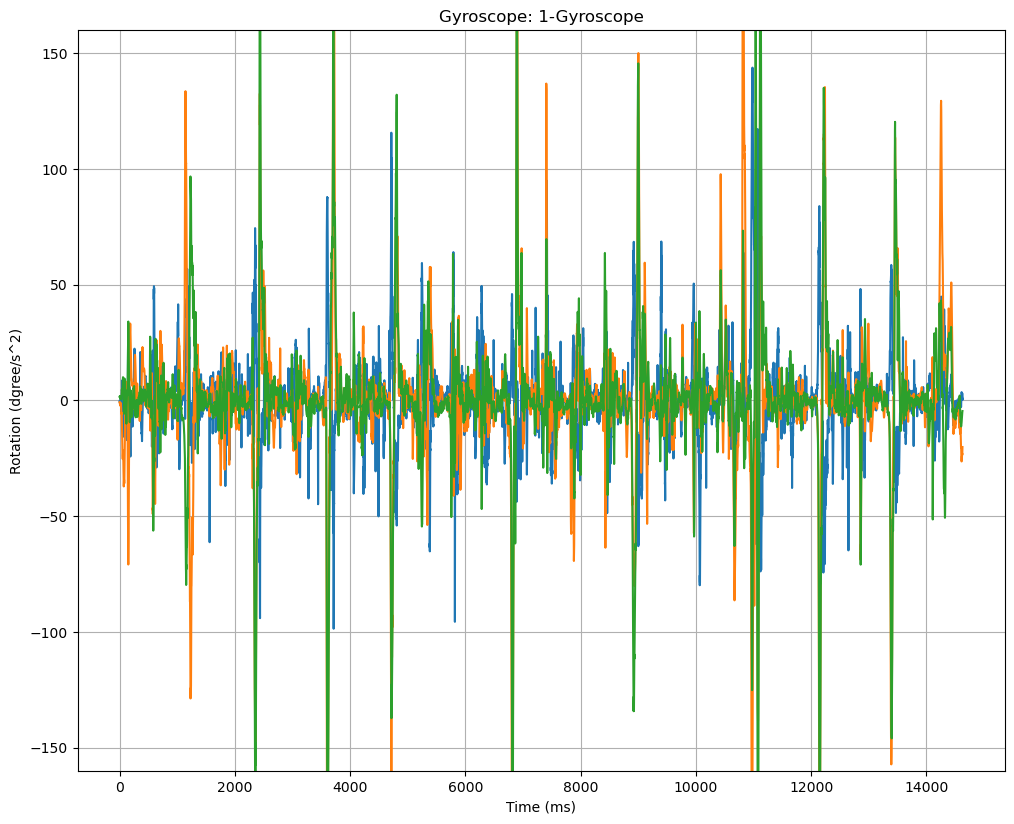

In [57]:
fig_gyroscope(browsing[browsing["sensor"] == "Gyroscope"].iloc[1,:]["path"])

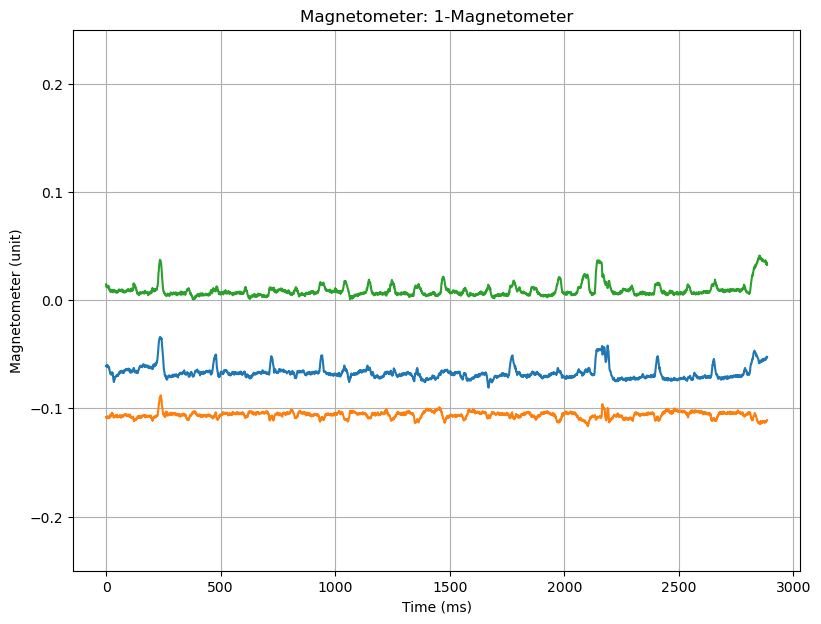

In [58]:
fig_magnetometer(browsing[browsing["sensor"] == "Magnetometer"].iloc[1,:]["path"])

Text(0.5, 1.0, 'Pressure: 1-Pressure')

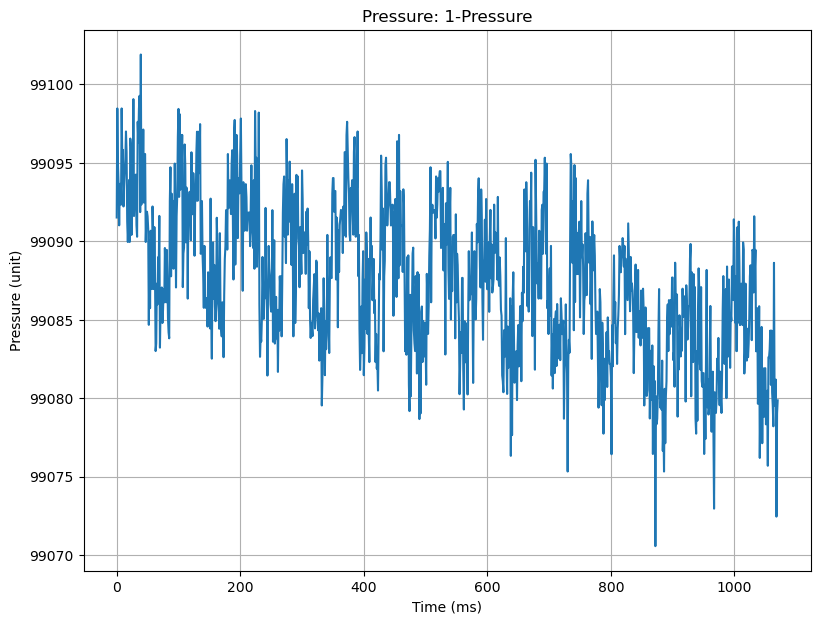

In [59]:
data_pre = pd.read_csv(browsing[browsing["sensor"] == "Pressure"].iloc[1,:]["path"])
data_pre.columns = ['timestamp', 'time', 'elapsed', 'pressure']

fig, axarr = plt.subplots(1, 1, figsize=(8,6), sharex=True)
fig.tight_layout()

# strs = file.split('\\')[6].split('_')
# label = strs[0] + '-' + strs[4]
label = "1" + '-' + "Pressure"
data_pre = data_pre[['pressure']]
data_pre = data_pre.reset_index(drop=True)
axarr.plot(data_pre)
# axarr.set_ylim(97200, 98000)
axarr.grid(which='both')
axarr.set_xlabel('Time (ms)')
axarr.set_ylabel('Pressure (unit)')
axarr.set_title('Pressure: ' + label)

In [60]:
data_pre.describe()

,pressure
count,1071.000000
mean,99087.439361
std,4.784351
min,99070.563000
25%,99084.078000
50%,99087.297000
75%,99091.016000
max,99101.906000


# Computing features

In [61]:
df[df["expID"] == 66]

,path,file,expID,sensor,frequency,exp_No,exp_Name


In [62]:
df.drop([84],inplace=True)

In [63]:
df["expID"].value_counts().index

Index([331, 133, 265, 267, 268, 269, 270, 271, 272, 275,
       ...
       206, 207, 208, 209, 173, 334, 273, 327, 325, 171],
      dtype='int32', name='expID', length=213)

# Feature Extraction

In [ ]:
result_list = []
for exp_id in df["expID"].value_counts().index:

    temp_df = df[df["expID"] == exp_id]

    # Check if both required sensors are present
    if not {"Accelerometer", "Gyroscope"}.issubset(set(temp_df["sensor"])):
        continue


    acc_data = pd.read_csv(temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,0])
    #acc_data = acc_data[['x-axis (g)','y-axis (g)','z-axis (g)']] * 9.8 * 4
    acc_data.rename(columns={'x-axis (g)':'x','y-axis (g)':'y','z-axis (g)':'z'},inplace=True)
    acc_data = acc_data[['x','y','z']]

    gyr_data = pd.read_csv(temp_df[temp_df["sensor"] == "Gyroscope"].iloc[0,0])
    gyr_data.rename(columns={'x-axis (deg/s)':'x','y-axis (deg/s)':'y','z-axis (deg/s)':'z'},inplace=True)
    gyr_data = gyr_data[['x','y','z']]

    window_size = 100 # sampling rate
    step_size = window_size // 2  # 50% overlap
    j = 0
    for i in range(0, len(acc_data), step_size):
        window_acc_data = acc_data[i:i+window_size]
        if len(window_acc_data) < window_size:
            break
        #compute the features for the current window
        acc_x_mean = window_acc_data["x"].mean()
        acc_x_var = window_acc_data["y"].var()
        acc_y_mean = window_acc_data["z"].mean()
        acc_y_var = window_acc_data["y"].var()
        acc_z_mean = window_acc_data["z"].mean()
        acc_z_var = window_acc_data["z"].var()
        acc_sumxyz = window_acc_data.sum()
        acc_sum_mean = acc_sumxyz.mean()
        acc_sum_var = acc_sumxyz.var()
        acc_abssum = window_acc_data.abs().sum()
        acc_abssum_mean = acc_abssum.mean()
        acc_abssum_var = acc_abssum.var()
        acc_maxabssum = acc_abssum.max()


        window_data_gyr = gyr_data[i:i+window_size]
        #compute the features for the current window
        gyr_x_mean = window_data_gyr["x"].mean()
        gyr_x_var = window_data_gyr["x"].var()
        gyr_y_mean = window_data_gyr["y"].mean()
        gyr_y_var = window_data_gyr["y"].var()
        gyr_z_mean = window_data_gyr["z"].mean()
        gyr_z_var = window_data_gyr["z"].var()
        gyr_sumxyz = window_data_gyr.sum()
        gyr_sum_mean = gyr_sumxyz.mean()
        gyr_sum_var = gyr_sumxyz.var()
        gyr_abssum = window_data_gyr.abs().sum()
        gyr_abssum_mean = gyr_abssum.mean()
        gyr_abssum_var = gyr_abssum.var()
        gyr_maxabssum = gyr_abssum.max()
        result_list.append([acc_x_mean, acc_x_var, acc_y_mean,
                              acc_y_var, acc_z_mean, acc_z_var,
                              acc_sum_mean, acc_abssum_mean, acc_sum_var,
                              acc_abssum_var, acc_maxabssum, gyr_x_mean,
                              gyr_x_var, gyr_y_mean, gyr_y_var,
                              gyr_z_mean, gyr_z_var, gyr_sum_mean,
                              gyr_abssum_mean, gyr_sum_var, gyr_abssum_var,
                              gyr_maxabssum, temp_df[temp_df["sensor"] == "Accelerometer"].iloc[0,5]])


In [65]:
result_df = pd.DataFrame(result_list)

In [66]:
result_df.to_csv("Selected_Feature_50percent_overlap.csv")

In [67]:
result_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.12591,0.000135,-0.29717,0.000135,-0.29717,0.000404,16.081667,44.287000,4232.809585,1678.732036,...,6.67981,171.478332,-11.21830,106.986577,-193.378333,723.703667,8.042319e+05,2.343510e+05,1121.830,1
1,-0.16810,0.000611,-0.30815,0.000611,-0.30815,0.003959,14.195333,45.945333,4382.821190,1518.621940,...,44.85727,2396.328776,-18.26042,121.500578,649.102000,2403.292667,1.134983e+07,4.036359e+06,4637.797,1
2,-0.12777,0.001937,-0.24973,0.001937,-0.24973,0.009547,17.212000,42.387333,3944.000311,1693.683226,...,39.27315,2738.971092,-18.50915,97.464123,839.735667,2562.213667,8.465150e+06,2.082959e+06,4223.045,1
3,-0.24823,0.018606,-0.46501,0.018606,-0.46501,0.109713,1.810667,49.368667,4330.086162,679.751796,...,2.84265,116.710911,-11.87683,166.391038,584.774667,1762.784667,3.764553e+06,1.266397e+06,2959.940,1
4,-0.29939,0.005014,-0.72491,0.005014,-0.72491,0.030852,-13.194333,55.092333,4789.381457,497.769317,...,-4.20004,119.736498,11.43354,354.629938,494.692667,1908.640000,6.641032e+05,9.248934e+05,2817.808,1
